# IMPORT LIBRARIES AND DATASET

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from tabulate import tabulate
from IPython.display import display
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from collections import Counter
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
from google.colab import files
import string

df = pd.read_csv("/content/job_resumes.csv")
df.rename(columns={
    "Category": "category",
    "Text": "descriptions"
}, inplace=True)
df.head()

,category,descriptions
0,Accountant,education omba executive leadership university...
1,Accountant,howard gerrard accountant deyjobcom birmingham...
2,Accountant,kevin frank senior accountant inforesumekraftc...
3,Accountant,place birth nationality olivia ogilvy accounta...
4,Accountant,stephen greet cpa senior accountant 9 year exp...


In [3]:
print("DataFrame Information:\n")
print(df.info())
print("\nDataFrame Description:\n")
df.describe()

DataFrame Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13389 entries, 0 to 13388
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   category      13389 non-null  object
 1   descriptions  13389 non-null  object
dtypes: object(2)
memory usage: 209.3+ KB
None

DataFrame Description:



,category,descriptions
count,13389,13389
unique,43,12085
top,Education,jessica claire 100 montgomery st 10th floor 55...
freq,410,5


# Missing Values

In [4]:
# check missing values
null_values = df.isna().sum().sum()
total_data = len(df)
print(f"Total Missing Values: {null_values} ({round(null_values/total_data*100, 2)}%)")

Total Missing Values: 0 (0.0%)


In [5]:
# remove missing values
df_rm = df.dropna()
df_rm.isna().sum()

,0
category,0
descriptions,0


# EXPLORE KATEGORI

In [6]:
df_rm['category'].value_counts()

,count
category,
Education,410
Electrical Engineering,384
Mechanical Engineer,384
Consultant,368
Sales,364
Civil Engineer,364
Management,361
Human Resources,360
Digital Media,358


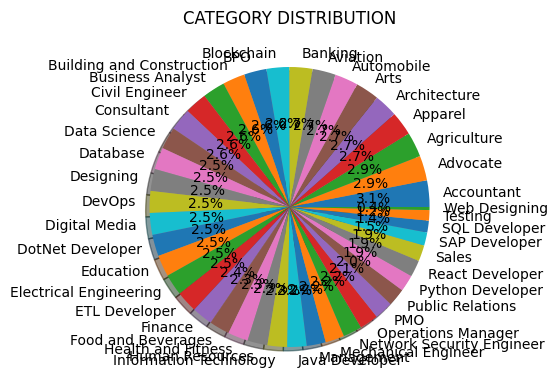

In [7]:
from matplotlib.gridspec import GridSpec
targetCounts = df_rm['category'].value_counts()
targetLabels  = df_rm['category'].unique()

plt.figure(1, figsize=(15,10))
the_grid = GridSpec(2, 2)
cmap = plt.get_cmap('coolwarm')
plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')

source_pie = plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True)
plt.show()

# TEXT CLEANING

## Cleaning Data

In [8]:
def clean_text(text):
    """
    Membersihkan teks:
    - Menghapus URL
    - Menghapus email
    - Menghapus mention dan hashtag
    - Menghapus angka
    - Menghapus tanda baca
    """
    if pd.isna(text):
        return ""

    # Hapus URL
    text = re.sub(r'https?://\S+|www\.\S+', '', text)
    # Hapus email
    text = re.sub(r'\S+@\S+', '', text)
    # Hapus mention dan hashtag
    text = re.sub(r'@\w+|#\w+', '', text)
    # Hapus angka
    text = re.sub(r'\d+', '', text)
    # Hapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Hapus spasi berlebih
    text = re.sub(r'\s+', ' ', text).strip()
    return text


def clean_dataframe(df):
    # Assuming 'descriptions' is the column to clean
    df['clean_descriptions'] = df['descriptions'].apply(clean_text)
    return df[['descriptions', 'clean_descriptions']].head()


# Now you should be able to use df1_rm within your clean_dataframe function:
print("Dataset Job:")
display(clean_dataframe(df_rm))  # Now this should work

Dataset Job:


,descriptions,clean_descriptions
0,education omba executive leadership university...,education omba executive leadership university...
1,howard gerrard accountant deyjobcom birmingham...,howard gerrard accountant deyjobcom birmingham...
2,kevin frank senior accountant inforesumekraftc...,kevin frank senior accountant inforesumekraftc...
3,place birth nationality olivia ogilvy accounta...,place birth nationality olivia ogilvy accounta...
4,stephen greet cpa senior accountant 9 year exp...,stephen greet cpa senior accountant year exper...


## Case Folding

In [9]:
def case_folding(text):
    """
    Mengubah teks menjadi huruf kecil.
    """
    if pd.isna(text):
        return ""
    return text.lower()

def case_dataframe(df):
    if 'clean_descriptions' in df.columns:
        df['case_descriptions'] = df['clean_descriptions'].apply(case_folding)
        return df[['clean_descriptions', 'case_descriptions']].head()

print("Dataset Job:")
display(case_dataframe(df_rm))  # Now this should work

Dataset Job:


,clean_descriptions,case_descriptions
0,education omba executive leadership university...,education omba executive leadership university...
1,howard gerrard accountant deyjobcom birmingham...,howard gerrard accountant deyjobcom birmingham...
2,kevin frank senior accountant inforesumekraftc...,kevin frank senior accountant inforesumekraftc...
3,place birth nationality olivia ogilvy accounta...,place birth nationality olivia ogilvy accounta...
4,stephen greet cpa senior accountant year exper...,stephen greet cpa senior accountant year exper...


## Tokenizing

In [10]:
def tokenize_text(text):
    """
    Memecah teks menjadi token (kata-kata).
    """
    if pd.isna(text):
        return []
    return word_tokenize(text)

def tokenizing_dataframe(df):
    if 'case_descriptions' in df.columns:
        df['tokenizing_descriptions'] = df['case_descriptions'].apply(case_folding)
        return df[['case_descriptions', 'tokenizing_descriptions']].head()

print("Dataset Job:")
display(tokenizing_dataframe(df_rm))  # Now this should work

Dataset Job:


,case_descriptions,tokenizing_descriptions
0,education omba executive leadership university...,education omba executive leadership university...
1,howard gerrard accountant deyjobcom birmingham...,howard gerrard accountant deyjobcom birmingham...
2,kevin frank senior accountant inforesumekraftc...,kevin frank senior accountant inforesumekraftc...
3,place birth nationality olivia ogilvy accounta...,place birth nationality olivia ogilvy accounta...
4,stephen greet cpa senior accountant year exper...,stephen greet cpa senior accountant year exper...


## Stopwords Removal

In [11]:
nltk.download('stopwords')

# Set stopwords
stop_words = set(stopwords.words('english'))

# Daftar nama orang yang mau dihapus (bisa kamu tambah)
nama_orang = set([
    'jessica', 'claire', 'stephen', 'olivia', 'kevin', 'howard', 'frank', 'olivia', 'st', 'th', 'newyork',
    'greet', 'gerrard', 'san', 'francisco', 'ca', 'street', 'include', 'city','state', 'montgomery'  # tambahkan jika ada yang spesifik
])

# Gabungkan stopwords dan nama orang jadi satu set
kata_terlarang = stop_words.union(nama_orang)

def remove_stopwords_and_names(text):
    if pd.isna(text):
        return ""
    words = text.split()
    words = [word for word in words if word not in kata_terlarang]
    return " ".join(words)

def stopword_dataframe(df):
    if 'tokenizing_descriptions' in df.columns:
        df['stopword_descriptions'] = df['tokenizing_descriptions'].apply(remove_stopwords_and_names)
        return df[['tokenizing_descriptions', 'stopword_descriptions']].head()

# Tampilkan hasil
print("Dataset Job:")
display(stopword_dataframe(df_rm))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Dataset Job:


,tokenizing_descriptions,stopword_descriptions
0,education omba executive leadership university...,education omba executive leadership university...
1,howard gerrard accountant deyjobcom birmingham...,accountant deyjobcom birmingham infodayjobcom ...
2,kevin frank senior accountant inforesumekraftc...,senior accountant inforesumekraftcom chicago i...
3,place birth nationality olivia ogilvy accounta...,place birth nationality ogilvy accountant paci...
4,stephen greet cpa senior accountant year exper...,cpa senior accountant year experience establis...


## Lemmatization

In [12]:
nltk.download('wordnet')
nltk.download('omw-1.4')

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    if pd.isna(text):
        return ""
    words = text.split()
    words = [lemmatizer.lemmatize(word, wordnet.VERB) for word in words]
    words = [lemmatizer.lemmatize(word, wordnet.NOUN) for word in words]
    words = [re.sub(r'(?<!s)s$', '', word) for word in words]
    words = [re.sub(r'(?<!e)es$', '', word) for word in words]
    words = [re.sub(r'(?<!e)ly$', '', word) for word in words]
    return " ".join(words)

def lemmatize_dataframe(df):
    if 'stopword_descriptions' in df.columns:
        df['lemma_descriptions'] = df['stopword_descriptions'].apply(lemmatize_text)
        return df[['stopword_descriptions', 'lemma_descriptions']].head()

# Tampilkan hasil
print("Dataset Job:")
display(lemmatize_dataframe(df_rm))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Dataset Job:


,stopword_descriptions,lemma_descriptions
0,education omba executive leadership university...,education omba executive leadership university...
1,accountant deyjobcom birmingham infodayjobcom ...,accountant deyjobcom birmingham infodayjobcom ...
2,senior accountant inforesumekraftcom chicago i...,senior accountant inforesumekraftcom chicago i...
3,place birth nationality ogilvy accountant paci...,place birth nationality ogilvy accountant paci...
4,cpa senior accountant year experience establis...,cpa senior accountant year experience establis...


## Wordcloud

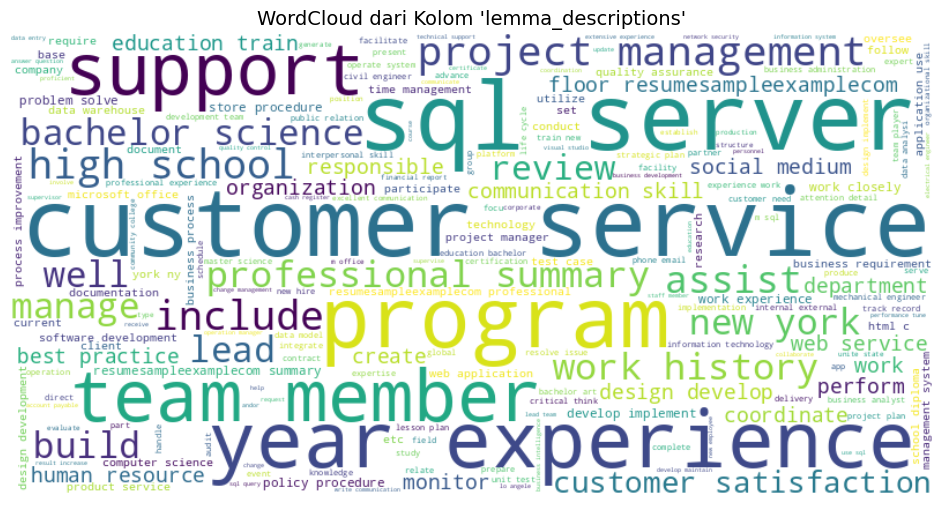

In [13]:
text_data = " ".join(df_rm['lemma_descriptions'].dropna())

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis', max_words=200).generate(text_data)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud dari Kolom 'lemma_descriptions'", fontsize=14)
plt.show()

# LABEL ENCODING

In [14]:
train_set, test_set = train_test_split(df_rm, test_size=0.2, random_state=42, stratify=df_rm['category'])

In [15]:
label_encoder = LabelEncoder()

# Encode kategori
train_set['category_encoded'] = label_encoder.fit_transform(train_set['category'])
test_set['category_encoded'] = label_encoder.transform(test_set['category'])

# Buat tabel mapping kategori
category_mapping = pd.DataFrame({
    'category': label_encoder.classes_,
    'category_encoded': range(len(label_encoder.classes_))
})

print("Mapping kategori:")
print(category_mapping)

Mapping kategori:
                     category  category_encoded
0                  Accountant                 0
1                    Advocate                 1
2                 Agriculture                 2
3                     Apparel                 3
4                Architecture                 4
5                        Arts                 5
6                  Automobile                 6
7                    Aviation                 7
8                         BPO                 8
9                     Banking                 9
10                 Blockchain                10
11  Building and Construction                11
12           Business Analyst                12
13             Civil Engineer                13
14                 Consultant                14
15               Data Science                15
16                   Database                16
17                  Designing                17
18                     DevOps                18
19              Digita

# TF-IDF

In [16]:
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1,2))

# Assuming 'lemma_descriptions' is your text feature and 'category_encoded' is your target variable
X_train = train_set['lemma_descriptions'] # Define X_train using the training data
y_train = train_set['category_encoded'] # Define y_train using the training data
X_test = test_set['lemma_descriptions']  # Define X_test using the testing data
y_test = test_set['category_encoded']  # Define y_test using the testing data

# training
X_train_tfidf = pd.DataFrame(vectorizer.fit_transform(X_train).toarray(), columns=vectorizer.get_feature_names_out())

# testing
X_test_tfidf = pd.DataFrame(vectorizer.transform(X_test).toarray(), columns=vectorizer.get_feature_names_out())

print("TF-IDF Vectorization Selesai")
print("Dimensi Matrix TF-IDF Data Train:", X_train_tfidf.shape)
print("Dimensi Matrix TF-IDF Data Test:", X_test_tfidf.shape)

TF-IDF Vectorization Selesai
Dimensi Matrix TF-IDF Data Train: (10711, 5000)
Dimensi Matrix TF-IDF Data Test: (2678, 5000)


# FEATURE SELECTION

In [17]:
from sklearn.feature_selection import SelectKBest, chi2

k_best_features_count = 1000 # Number of top features you want to select

selector = SelectKBest(score_func=chi2, k=k_best_features_count)
X_train_selected = selector.fit_transform(X_train_tfidf, y_train)

# Transforming test set based on selected features:
mask_selected_features = selector.get_support() # Get boolean mask of selected features
X_test_selected = X_test_tfidf.loc[:, mask_selected_features]

# Create a list of feature names for those that were selected:
selected_feature_names = vectorizer.get_feature_names_out()[mask_selected_features]

# Convert arrays back to DataFrames:
X_train_selected_df = pd.DataFrame(X_train_selected, columns=selected_feature_names)
X_test_selected_df = pd.DataFrame(X_test_selected, columns=selected_feature_names)

print("Dimensi Data Train:", X_train_selected_df.shape)
print("Dimensi Data Test:", X_test_selected_df.shape)

Dimensi Data Train: (10711, 1000)
Dimensi Data Test: (2678, 1000)


# CLASS BALANCING

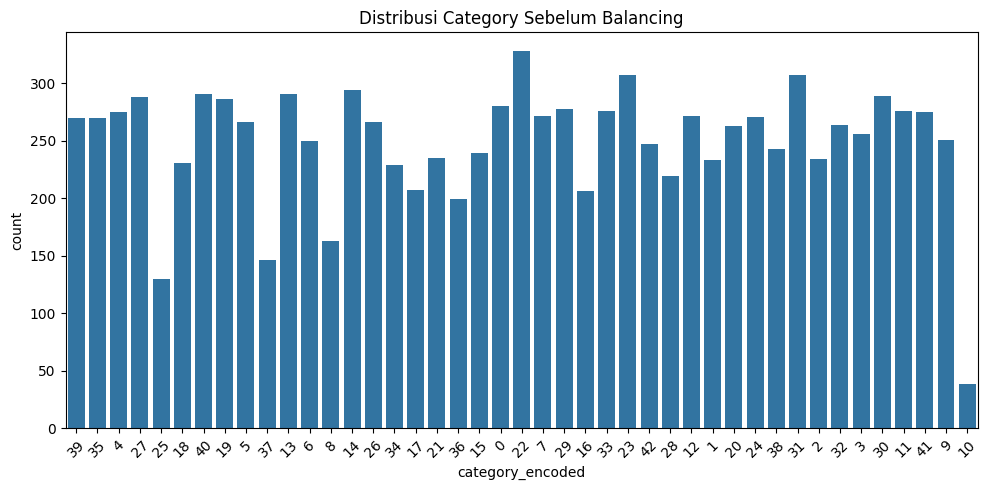

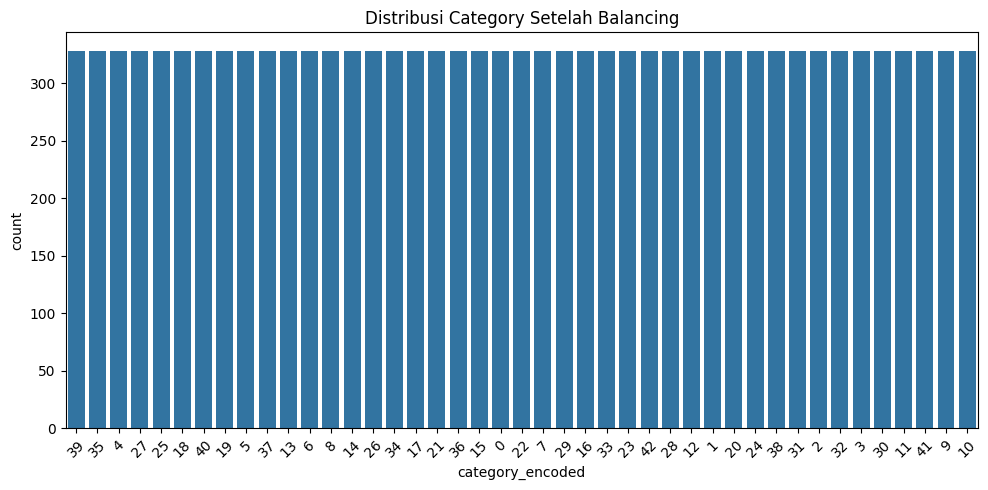

In [18]:
# Visualisasi sebelum balancing
y_train_str = y_train.astype(str)
plt.figure(figsize=(10,5))
sns.countplot(x=y_train_str)
plt.title('Distribusi Category Sebelum Balancing')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Lakukan random oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_selected_df, y_train)

# Visualisasi setelah balancing
y_resampled_str = y_resampled.astype(str)
plt.figure(figsize=(10,5))
sns.countplot(x=y_resampled_str)
plt.title('Distribusi Category Setelah Balancing')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# FINAL MODELLING

In [19]:
# Train final model using optimal_k on resampled data
final_model = RandomForestClassifier(random_state=42)
final_model.fit(X_resampled, y_resampled)

# Make predictions on test set (X_test_selected_df)
y_pred = final_model.predict(X_test_selected_df)

# Evaluate model performance by comparing predictions with actual labels (y_test)
print("Accuracy:", accuracy_score(y_test.values.ravel(), y_pred))
print("\nClassification Report:\n", classification_report(y_test.values.ravel(), y_pred))

Accuracy: 0.8248693054518297

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.96      0.84        70
           1       0.78      0.90      0.83        58
           2       0.84      1.00      0.91        59
           3       0.90      0.84      0.87        64
           4       0.82      0.71      0.76        69
           5       0.92      0.83      0.87        66
           6       0.77      0.65      0.71        63
           7       0.87      1.00      0.93        68
           8       0.90      0.68      0.77        40
           9       0.78      0.92      0.85        63
          10       1.00      0.89      0.94         9
          11       0.83      0.93      0.88        69
          12       0.86      0.91      0.89        68
          13       0.90      0.89      0.90        73
          14       0.87      0.65      0.74        74
          15       0.91      0.67      0.77        60
          16       0.79    

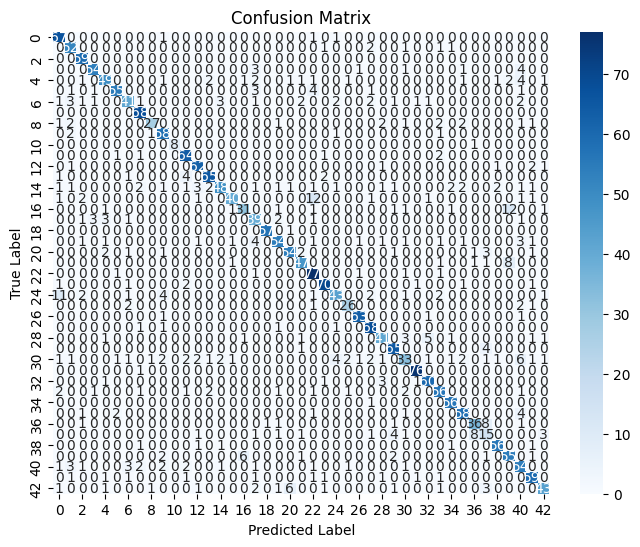

In [20]:
cm = confusion_matrix(y_test.values.ravel(), y_pred)

# Step 7: Visualize Confusion Matrix using Seaborn Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# TESTING

In [21]:
new_data = test_set.iloc[:20]['lemma_descriptions'].to_list()
answers = test_set.iloc[:20]['category_encoded'].to_list()

In [22]:
# tfidf
new_data_tfidf = pd.DataFrame(vectorizer.transform(new_data).toarray(), columns=vectorizer.get_feature_names_out())

# feature selection
new_data_selected = new_data_tfidf.loc[:, mask_selected_features]

# prediction
new_data_prediction = final_model.predict(new_data_selected)

print(f"Correct Predictions: {(sum(new_data_prediction == answers)/len(answers)*100)}%\n")
for answer, prediction in zip(answers, new_data_prediction):
    print(f" - Answer: {label_encoder.inverse_transform([answer])} | Prediction: {label_encoder.inverse_transform([prediction])}")

Correct Predictions: 75.0%

 - Answer: ['DotNet Developer'] | Prediction: ['Java Developer']
 - Answer: ['Automobile'] | Prediction: ['Automobile']
 - Answer: ['Automobile'] | Prediction: ['Finance']
 - Answer: ['Java Developer'] | Prediction: ['Java Developer']
 - Answer: ['Human Resources'] | Prediction: ['Human Resources']
 - Answer: ['Sales'] | Prediction: ['Sales']
 - Answer: ['DevOps'] | Prediction: ['DevOps']
 - Answer: ['Mechanical Engineer'] | Prediction: ['Mechanical Engineer']
 - Answer: ['Java Developer'] | Prediction: ['Java Developer']
 - Answer: ['React Developer'] | Prediction: ['Java Developer']
 - Answer: ['Python Developer'] | Prediction: ['Python Developer']
 - Answer: ['Information Technology'] | Prediction: ['Architecture']
 - Answer: ['Management'] | Prediction: ['Management']
 - Answer: ['Civil Engineer'] | Prediction: ['Civil Engineer']
 - Answer: ['DevOps'] | Prediction: ['DevOps']
 - Answer: ['Information Technology'] | Prediction: ['Information Technology']


# FILE TESTING

Saving resume fauzan.pdf to resume fauzan (4).pdf


Results for File: resume fauzan (4).pdf

Predicted Category for the User Input Resume (with probabilities):
- Accountant: 0.00%
- Advocate: 0.00%
- Agriculture: 0.00%
- Apparel: 0.00%
- Architecture: 0.00%
- Arts: 0.00%
- Automobile: 0.00%
- Aviation: 0.00%
- BPO: 0.00%
- Banking: 0.00%
- Blockchain: 75.00%
- Building and Construction: 0.00%
- Business Analyst: 1.00%
- Civil Engineer: 1.00%
- Consultant: 1.00%
- Data Science: 0.00%
- Database: 0.00%
- Designing: 1.00%
- DevOps: 1.00%
- Digital Media: 0.00%
- DotNet Developer: 2.00%
- ETL Developer: 0.00%
- Education: 1.00%
- Electrical Engineering: 0.00%
- Finance: 0.00%
- Food and Beverages: 0.00%
- Health and Fitness: 0.00%
- Human Resources: 0.00%
- Information Technology: 1.00%
- Java Developer: 0.00%
- Management: 0.00%
- Mechanical Engineer: 0.00%
- Network Security Engineer: 1.00%
- Operations Manager: 0.00%
- PMO: 0.00%
- Public Relations: 0.00%
- Python Developer: 1.00%
- Rea

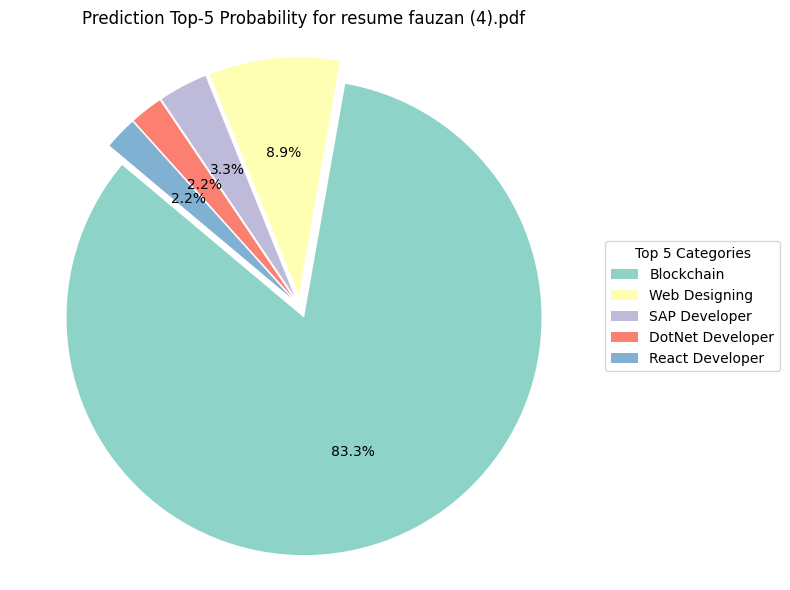

In [28]:
# Upload File
from google.colab import files
uploaded = files.upload()

# Limit to a maximum of 5 files
max_files = 5
uploaded_files = list(uploaded.keys())[:max_files]

# Install and import necessary libraries
!pip install PyPDF2
import pandas as pd
import matplotlib.pyplot as plt
from PyPDF2 import PdfReader
import numpy as np

# Assume these are already defined earlier:
# clean_text, case_folding, remove_stopwords_and_names, lemmatize_text
# vectorizer, X_train_selected_df, final_model, label_encoder

for filename in uploaded_files:
    # === PDF Reading ===
    if filename.lower().endswith('.pdf'):
        try:
            with open(filename, 'rb') as file:
                reader = PdfReader(file)
                user_resume = ""
                for page_num in range(len(reader.pages)):
                    text = reader.pages[page_num].extract_text()
                    if text:
                        user_resume += text + "\n"
        except Exception as e:
            print(f"Error reading PDF file {filename}: {e}")
            continue
    else:
        print(f"Skipping non-PDF file: {filename}")
        continue

    # === PREPROCESSING ===
    cleaned_resume = clean_text(user_resume)
    folded_resume = case_folding(cleaned_resume)
    rm_resume = remove_stopwords_and_names(folded_resume)
    lemma_resume = lemmatize_text(rm_resume)

    # === TF-IDF TRANSFORMATION ===
    resume_tfidf = pd.DataFrame(
        vectorizer.transform([lemma_resume]).toarray(),
        columns=vectorizer.get_feature_names_out()
    )

    # === FEATURE SELECTION ===
    resume_selected = resume_tfidf[X_train_selected_df.columns]

    # === PREDICTION ===
    resume_prediction = final_model.predict(resume_selected)
    user_prediction_proba = final_model.predict_proba(resume_selected)
    class_labels = final_model.classes_

    # === OUTPUT & PROBABILITIES ===
    print(f"\n\nResults for File: {filename}")
    print("\nPredicted Category for the User Input Resume (with probabilities):")
    labels = []
    probabilities = []

    for i, label in enumerate(class_labels):
        category = label_encoder.inverse_transform([int(label)])[0]
        prob = user_prediction_proba[0][i]
        labels.append(category)
        probabilities.append(prob)
        print(f"- {category}: {prob:.2%}")

    final_category = label_encoder.inverse_transform(resume_prediction)[0]
    print(f"\nFinal Category Prediction: {final_category}")

    # === TOP-5 VISUALIZATION PIE CHART ===
    # Ambil Top-5 kategori berdasarkan probabilitas
    labels_filtered = []
    probs_filtered = []
    for lbl, prob in zip(labels, probabilities):
        if prob > 0.00:
            labels_filtered.append(lbl)
            probs_filtered.append(prob)

    # Urutkan berdasarkan probabilitas terbesar
    sorted_indices = np.argsort(probs_filtered)[::-1]
    labels_top5 = [labels_filtered[i] for i in sorted_indices[:5]]
    probs_top5 = [probs_filtered[i] for i in sorted_indices[:5]]

    # Pie chart top 5
    explode = [0.05] * len(probs_top5)
    colors = plt.cm.Set3.colors

    plt.figure(figsize=(8, 6))
    wedges, texts, autotexts = plt.pie(
        probs_top5,
        labels=None,
        autopct='%1.1f%%',
        explode=explode,
        startangle=140,
        colors=colors[:len(probs_top5)],
        textprops={'fontsize': 11}
    )

    for autotext in autotexts:
        autotext.set_color('black')
        autotext.set_fontsize(10)

    plt.legend(
        wedges,
        labels_top5,
        title="Top 5 Categories",
        loc="center left",
        bbox_to_anchor=(1, 0, 0.5, 1),
        fontsize=10
    )

    plt.title(f'Prediction Top-5 Probability for {filename}', fontsize=12)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()